# Section 1- and SPARK **Setup**

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

In [3]:
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [5]:
!pip install -q findspark
import findspark
findspark.init()

In [6]:
from pyspark.sql import SparkSession
spark = (SparkSession
.builder
.appName("DGAssignmentKP")
.getOrCreate())

## Reading Our Data

In [7]:
df_iplbbb = spark.read.format("csv").option('header', "true").load("/content/drive/MyDrive/Colab-Data/ipl_ball_by_ball.csv")
df_iplmat = spark.read.format("csv").option('header', "true").load("/content/drive/MyDrive/Colab-Data/ipl_matches.csv")
df_iplven = spark.read.format("csv").option('header', "true").load("/content/drive/MyDrive/Colab-Data/ipl_venue.csv")

In [8]:
df_iplmat.show(), df_iplmat.count()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|  Asad Rauf|   RE Koertzen|
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super 

(None, 816)

In [9]:
df_iplmat.dtypes

[('match_id', 'string'),
 ('date', 'string'),
 ('player_of_match', 'string'),
 ('venue_id', 'string'),
 ('neutral_venue', 'string'),
 ('team1', 'string'),
 ('team2', 'string'),
 ('toss_winner', 'string'),
 ('toss_decision', 'string'),
 ('winner', 'string'),
 ('result', 'string'),
 ('result_margin', 'string'),
 ('eliminator', 'string'),
 ('method', 'string'),
 ('umpire1', 'string'),
 ('umpire2', 'string')]

In [10]:
df_iplven.show()

+--------+--------------------+--------------+
|venue_id|               venue|          city|
+--------+--------------------+--------------+
|       1|Dr. Y.S. Rajasekh...| Visakhapatnam|
|       2|Sharjah Cricket S...|       Sharjah|
|       3|JSCA Internationa...|        Ranchi|
|       4|Saurashtra Cricke...|        Rajkot|
|       5|Shaheed Veer Nara...|        Raipur|
|       6|Maharashtra Crick...|          Pune|
|       7|Subrata Roy Sahar...|          Pune|
|       8|    St George's Park|Port Elizabeth|
|       9|Vidarbha Cricket ...|        Nagpur|
|      12|   Brabourne Stadium|        Mumbai|
|      13|Dr DY Patil Sport...|        Mumbai|
|      14|    Wankhede Stadium|        Mumbai|
|      15|        Eden Gardens|       Kolkata|
|      16|       Nehru Stadium|         Kochi|
|      17|De Beers Diamond ...|     Kimberley|
|      18|          Green Park|        Kanpur|
|      19|New Wanderers Sta...|  Johannesburg|
|      20|Sawai Mansingh St...|        Jaipur|
|      21|Hol

In [11]:
df_iplbbb.show()

+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|match_id|inning|overs|ball|      batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|        bowling_team|
+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|  419157|     2|   16|   4|      V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|            NA|              NA|     NA|         NA|Royal Challengers...|      Mumbai Indians|
|  419157|     2|   16|   5|      V Kohli|R Vinay Kumar|CRD Fernando|           1|         0|         1|        

Registering the data as Temp Tables

In [12]:
df_iplbbb.registerTempTable("IPL_BBB")
df_iplmat.registerTempTable("IPL_MAT")
df_iplven.registerTempTable("IPL_VEN")

In [13]:
spark.catalog.listTables()

[Table(name='ipl_bbb', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='ipl_mat', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='ipl_ven', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [14]:
print("The length of IPL DF are as follows (i.e. Number of rows) : \n \
 1. IPL_Ball_by_Ball : {} \
  \n 2. IPL_Matches\
 : {} \n 3. IPL_Venue : {}".format(df_iplbbb.count(), df_iplmat.count(),df_iplven.count()))

The length of IPL DF are as follows (i.e. Number of rows) : 
  1. IPL_Ball_by_Ball : 193468   
 2. IPL_Matches : 816 
 3. IPL_Venue : 35


Reading Ball_by_Ball Data

In [15]:
ipl_bbb1 = spark.read.format("csv").option('header', "true").load("/content/drive/MyDrive/Colab-Data/ipl_ball_by_ball_split/ipl_ball_by_ball_1.csv")
ipl_bbb2 = spark.read.format("csv").option('header', "true").load("/content/drive/MyDrive/Colab-Data/ipl_ball_by_ball_split/ipl_ball_by_ball_2.csv")
ipl_bbb3 = spark.read.format("csv").option('header', "true").load("/content/drive/MyDrive/Colab-Data/ipl_ball_by_ball_split/ipl_ball_by_ball_3.csv")
ipl_bbb4 = spark.read.format("csv").option('header', "true").load("/content/drive/MyDrive/Colab-Data/ipl_ball_by_ball_split/ipl_ball_by_ball_4.csv")
ipl_bbb5 = spark.read.format("csv").option('header', "true").load("/content/drive/MyDrive/Colab-Data/ipl_ball_by_ball_split/ipl_ball_by_ball_5.csv")

In [16]:
print("The length of IPL DF seperately Ball by Ball are as follows (i.e. Number of rows) : \n \
1. IPL_Ball_by_Ball_First : {} \n \
2. IPL_Ball_by_Ball_Second : {} \n \
3. IPL_Ball_by_Ball_Third : {} \n \
4. IPL_Ball_by_Ball_Fourth : {} \n \
5. IPL_Ball_by_Ball_Fifth : {}".format( \
  ipl_bbb1.count(), \
  ipl_bbb2.count(), \
  ipl_bbb3.count(), \
  ipl_bbb4.count(), \
  ipl_bbb5.count()))

The length of IPL DF seperately Ball by Ball are as follows (i.e. Number of rows) : 
 1. IPL_Ball_by_Ball_First : 38693 
 2. IPL_Ball_by_Ball_Second : 38693 
 3. IPL_Ball_by_Ball_Third : 38693 
 4. IPL_Ball_by_Ball_Fourth : 38693 
 5. IPL_Ball_by_Ball_Fifth : 38692


## Section 2 - Questions & Solutions

**Q1 : Find the top 3 venues which hosted the most number of eliminator matches?**

In [17]:
df_mat_elem_Y = df_iplmat.filter(df_iplmat.eliminator == 'Y')

ids = df_mat_elem_Y.select("venue_id").collect()
max_ele = max(set(ids), key = ids.count)
max_ele

Row(venue_id='25')

In [18]:
df_iplven.filter(df_iplven.venue_id.contains(25)).show()

+--------+--------------------+-----+
|venue_id|               venue| city|
+--------+--------------------+-----+
|      25|Dubai Internation...|Dubai|
+--------+--------------------+-----+



SO, Here is our Venue name which hosted the most number of eliminator matches. 

**Q2 : Return most number of catches taken by a player in IPL history?**

In [19]:
df_iplbbb.select('dismissal_kind').distinct().show()

+--------------------+
|      dismissal_kind|
+--------------------+
|             stumped|
|          hit wicket|
|                  NA|
|              bowled|
|                 lbw|
|obstructing the f...|
|   caught and bowled|
|        retired hurt|
|              caught|
|             run out|
+--------------------+



In [20]:
df_bbb_caught_only = df_iplbbb.filter(df_iplbbb.dismissal_kind == 'caught')
print("Total wickets by catch are : {}".format(df_bbb_caught_only.count()))

Total wickets by catch are : 5743


In [21]:
df_bbb_caught_bowled = df_iplbbb.filter(df_iplbbb.dismissal_kind.contains("caught"))
print("Total wickets by Catch and Bowled together are : {}".format(df_bbb_caught_bowled.count()))

Total wickets by Catch and Bowled together are : 6012


In [22]:
ids_co = df_bbb_caught_only.select("bowler").collect()
ids_cb = df_bbb_caught_bowled.select("bowler").collect()

bowler_max_CO = max(set(ids_co), key = ids_co.count)
bowler_max_CB = max(set(ids_cb), key = ids_cb.count)

print("Most wicket taker by only catches is : {} \n and Most wicket taker by catches and bowled together is : {}".format(bowler_max_CO[0] , bowler_max_CB[0]))

Most wicket taker by only catches is : DJ Bravo 
 and Most wicket taker by catches and bowled together is : DJ Bravo


**Q3 : Write a query to return a report for highest wicket taker in matches which were affected by
Duckworth-Lewis’s method (D/L method).**

In [23]:
df_iplbbb.select('dismissal_kind').distinct().show()

+--------------------+
|      dismissal_kind|
+--------------------+
|             stumped|
|          hit wicket|
|                  NA|
|              bowled|
|                 lbw|
|obstructing the f...|
|   caught and bowled|
|        retired hurt|
|              caught|
|             run out|
+--------------------+



In [24]:
df_mat_DL = df_iplmat.filter(df_iplmat.method == 'D/L')

In [25]:
DLIds = []
for i in range(df_mat_DL.count()):
  id = df_mat_DL.select("match_id").collect()[i]['match_id']
  DLIds.append(id)

In [26]:
df_DL = df_iplbbb.filter((df_iplbbb.match_id).isin(DLIds))

In [27]:
df_DL_wic = df_DL.filter(df_DL.is_wicket == 1)

In [28]:
bow = df_DL_wic.select('bowler').distinct().collect()

bow_name = []
for i in range(df_DL_wic.count()):
  nm = df_DL_wic.select("bowler").collect()[i]['bowler']
  bow_name.append(nm)

# bow_name = df_DL_wic.select(df_DL_wic['bowler']).rdd.flatMap(lambda x:x).collect()

In [29]:
DL_Max_Wic_Bowler = max(set(bow_name), key = bow_name.count)
print("The most wicket taker in D/L matches is {}".format(DL_Max_Wic_Bowler))

The most wicket taker in D/L matches is AB Dinda


In [30]:
frequency = {}
print("Maximum Wickets takers by Catch bowlers report (in DLS Matches) \n")
for item in bow_name:
   if item in frequency:
      frequency[item] += 1
   else:
      frequency[item] = 1
k = 0
for w in sorted(frequency, key=frequency.get, reverse=True):
    print(w,">>",frequency[w], " Wicket/s")
    if k>20:
      break
    k+=1

Maximum Wickets takers by Catch bowlers report (in DLS Matches) 

R Ashwin >> 8  Wicket/s
AB Dinda >> 8  Wicket/s
MC Henriques >> 7  Wicket/s
B Kumar >> 6  Wicket/s
TA Boult >> 5  Wicket/s
L Balaji >> 5  Wicket/s
JD Unadkat >> 5  Wicket/s
DL Vettori >> 5  Wicket/s
A Mishra >> 4  Wicket/s
PP Chawla >> 4  Wicket/s
M Ntini >> 4  Wicket/s
YS Chahal >> 4  Wicket/s
UT Yadav >> 3  Wicket/s
NM Coulter-Nile >> 3  Wicket/s
S Nadeem >> 3  Wicket/s
NLTC Perera >> 3  Wicket/s
S Aravind >> 3  Wicket/s
A Zampa >> 3  Wicket/s
M Morkel >> 2  Wicket/s
AD Russell >> 2  Wicket/s
P Kumar >> 2  Wicket/s
RR Powar >> 2  Wicket/s


**Q4 : Write a query to return a report for highest strike rate by a batsman in non powerplay overs(7-20 overs).**

Note: strike rate = (Total Runs scored/Total balls faced by player) *100, Make sure that balls
faced by players should be legal delivery (not wide balls or no balls).

In [31]:
#Seperating the Non-PowerPlay overs
df_NP_Bat_Runs = df_iplbbb.filter(df_iplbbb.overs >=7).select(['batsman', 'batsman_runs'])
df_NP_Bat_Runs.show()

+-------------+------------+
|      batsman|batsman_runs|
+-------------+------------+
|      V Kohli|           0|
|      V Kohli|           1|
|R Vinay Kumar|           1|
|R Vinay Kumar|           1|
|      V Kohli|           1|
|R Vinay Kumar|           0|
|R Vinay Kumar|           0|
|R Vinay Kumar|           1|
|      V Kohli|           1|
|      V Kohli|           4|
|      V Kohli|           0|
|R Vinay Kumar|           0|
|R Vinay Kumar|           1|
| Pankaj Singh|           1|
|R Vinay Kumar|           1|
| Pankaj Singh|           0|
|     A Kumble|           0|
|     MS Dhoni|           0|
|     MS Dhoni|           2|
|     MS Dhoni|           2|
+-------------+------------+
only showing top 20 rows



In [52]:
import numpy as np
from pyspark.sql.functions import desc

players = df_NP_Bat_Runs.select('batsman').rdd.flatMap(lambda x: x).collect()
uni_players = np.unique(players)
len(uni_players)

521

In [33]:
max_scorer_player = ""
max_strike_rate = -1
player_score_Data = {}
for player in uni_players:
  rate = ((df_NP_Bat_Runs.filter(df_NP_Bat_Runs.batsman == player).agg({'batsman_runs': 'sum'}).collect()[0][0]) /  \
         (df_NP_Bat_Runs.filter(df_NP_Bat_Runs.batsman == player).count()))
  if rate > max_strike_rate:
    max_strike_rate = rate
    max_scorer_player = player

In [34]:
print("The Player with maximum strike rate in the Non Powerplay overs is : {} with rate of {} %".format(max_scorer_player, max_strike_rate*100))

The Player with maximum strike rate in the Non Powerplay overs is : B Stanlake with rate of 250.0 %


**Q5 : Write a query to return a report for highest extra runs in a venue (stadium, city).**

In [35]:
df_iplbbb.select('extra_runs').distinct().show()

+----------+
|extra_runs|
+----------+
|         7|
|         3|
|         0|
|         5|
|         1|
|         4|
|         2|
+----------+



We can see that the extra runs vary from 0 to 7 So, we need to sum up the extra runs by match id's and then according to the venue where they were played, we will return the venue name of most extra runs

In [36]:
df_extra_runs = df_iplbbb.filter(df_iplbbb.extra_runs > 0)

In [37]:
matches = df_extra_runs.select('match_id').rdd.flatMap(lambda x: x).collect()
matches = np.unique(matches)

In [38]:
Matches_Extras = []
for match in matches:
  extsum = df_extra_runs.filter(df_extra_runs.match_id == match).agg({'extra_runs': 'sum'}).collect()[0][0]
  tup = (int(match), extsum)
  Matches_Extras.append(tup)

In [39]:
columns = ["match_id","extra_runs_total"]
Matches_Extras[:10]

[(1082591, 13.0),
 (1082592, 12.0),
 (1082593, 19.0),
 (1082594, 16.0),
 (1082595, 11.0),
 (1082596, 6.0),
 (1082597, 21.0),
 (1082598, 10.0),
 (1082599, 13.0),
 (1082600, 15.0)]

In [40]:
Match_Ext_df = spark.createDataFrame(Matches_Extras, columns)

In [41]:
Match_Ext_df = Match_Ext_df.orderBy('match_id')

In [42]:
df_iplmat = df_iplmat.orderBy("match_id")

In [43]:
df_iplmat = df_iplmat.withColumn("match_id", df_iplmat["match_id"].cast("int"))
Match_Ext_df = Match_Ext_df.withColumn("match_id", Match_Ext_df["match_id"].cast("int"))

In [44]:
df_iplmat = df_iplmat.orderBy("match_id")
Match_Ext_df = Match_Ext_df.orderBy("match_id")

In [49]:
vids = df_iplven.select('venue_id').rdd.flatMap(lambda x: x).collect()

In [53]:
vid_exruns = []
for id in vids:
  ven_matches = df_iplmat.filter(df_iplmat.venue_id == int(id)).select(df_iplmat['match_id']).rdd.flatMap(lambda x: x).collect()
  verun = Match_Ext_df.filter(Match_Ext_df.match_id.isin(ven_matches)).rdd.map(lambda x: (1,x[1])).reduceByKey(lambda x,y: x + y).collect()[0][1]
  venname = df_iplven.filter(df_iplven.venue_id == id).collect()[0][1]
  viextup = (str(venname), int(verun))
  vid_exruns.append(viextup)

vid_run_df = spark.createDataFrame(vid_exruns, ['Venue_ID', 'Runs'])
vid_run_df = vid_run_df.orderBy(desc('Runs')).show()

+--------------------+----+
|            Venue_ID|Runs|
+--------------------+----+
|M.Chinnaswamy Sta...|1355|
|    Wankhede Stadium|1232|
|        Eden Gardens|1215|
|    Feroz Shah Kotla|1114|
|MA Chidambaram St...| 905|
|Rajiv Gandhi Inte...| 900|
|Sawai Mansingh St...| 791|
|Punjab Cricket As...| 566|
|Dubai Internation...| 492|
|Sheikh Zayed Stadium| 387|
|Dr DY Patil Sport...| 320|
|Maharashtra Crick...| 315|
|Sharjah Cricket S...| 287|
|           Kingsmead| 277|
|Punjab Cricket As...| 271|
|   Brabourne Stadium| 246|
|Subrata Roy Sahar...| 237|
|     SuperSport Park| 213|
|Himachal Pradesh ...| 177|
|Sardar Patel Stad...| 175|
+--------------------+----+
only showing top 20 rows



**Q6 : Write a query to return a report for the cricketers with the most number of players of the match award in neutral venues.**

In [54]:
df_iplmat.select('neutral_venue').distinct().show()

+-------------+
|neutral_venue|
+-------------+
|            0|
|            1|
+-------------+



In [56]:
from pyspark.sql.functions import desc

neu_ven = df_iplmat.filter(df_iplmat['neutral_venue'] == 1)
neu_ven = neu_ven.cube('player_of_match').count()
neu_ven.orderBy(desc('count')).show(10)

+----------------+-----+
| player_of_match|count|
+----------------+-----+
|            null|   77|
|       JH Kallis|    3|
|       JP Duminy|    3|
|       YK Pathan|    3|
|      GJ Maxwell|    3|
|  AB de Villiers|    2|
|    AC Gilchrist|    2|
|DPMD Jayawardene|    2|
|   KC Sangakkara|    2|
|  Sandeep Sharma|    2|
+----------------+-----+
only showing top 10 rows



So, Here we can see that the top players of the match in neutral venues are as follows : 

1.   GJ Maxwell|    3|
2.   JP Duminy|     3|
3.   JH Kallis|     3|
4.   YK Pathan|     3|


**Q7 : Write a query to get a list of top 10 players with the highest batting average Note: Batting average is the total number of runs scored divided by the number of times they have been out (Make sure to include run outs (on non-striker end) as valid out while calculating average).**

In [57]:
sub_df = df_iplbbb.select(df_iplbbb["match_id"],df_iplbbb["batsman"],df_iplbbb['non_striker'],df_iplbbb["batsman_runs"],df_iplbbb['extra_runs'],df_iplbbb['total_runs'],df_iplbbb["is_wicket"],df_iplbbb["dismissal_kind"],df_iplbbb["player_dismissed"])

In [58]:
sub_df.select('dismissal_kind').distinct().show()

+--------------------+
|      dismissal_kind|
+--------------------+
|             stumped|
|          hit wicket|
|                  NA|
|              bowled|
|                 lbw|
|obstructing the f...|
|   caught and bowled|
|        retired hurt|
|              caught|
|             run out|
+--------------------+



In [59]:
aggrun_batsman = []
for player in uni_players:
  aggrun = df_iplbbb.filter(df_iplbbb.batsman == player ).agg({'batsman_runs': 'sum'}).collect()[0][0]
  tupp = (str(player), int(aggrun))
  aggrun_batsman.append(tupp)

In [60]:
bats_aggrun = spark.createDataFrame(aggrun_batsman, ['player', 'Agg_Runs'])
bats_aggrun = bats_aggrun.orderBy('player')
bats_aggrun.show(5)

+--------------+--------+
|        player|Agg_Runs|
+--------------+--------+
|A Ashish Reddy|     280|
|    A Chandila|       4|
|      A Chopra|      53|
|   A Choudhary|      25|
|   A Dananjaya|       4|
+--------------+--------+
only showing top 5 rows



In [61]:
wic_balls = df_iplbbb.filter(df_iplbbb.is_wicket == 1)
wic_balls.show(5)

+--------+------+-----+----+------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|match_id|inning|overs|ball|     batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|  bowling_team|
+--------+------+-----+----+------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|  419157|     2|   18|   2|     V Kohli|R Vinay Kumar|  KA Pollard|           0|         0|         0|           0|        1|        caught|         V Kohli|AP Tare|         NA|Royal Challengers...|Mumbai Indians|
|  419157|     2|   18|   7|Pankaj Singh|R Vinay Kumar|  KA Pollard|           0|         0|         0|           0|        1|        caught

In [62]:
player_wics = []
for plr in uni_players:
  plr_wics = wic_balls.filter(wic_balls.player_dismissed == plr).count()
  ptu = (str(plr), int(plr_wics))
  player_wics.append(ptu)

In [63]:
player_wics = spark.createDataFrame(player_wics,['Player','tot_outs'])
player_wics.show()

+---------------+--------+
|         Player|tot_outs|
+---------------+--------+
| A Ashish Reddy|      15|
|     A Chandila|       0|
|       A Chopra|       6|
|    A Choudhary|       1|
|    A Dananjaya|       0|
|     A Flintoff|       2|
|       A Kumble|       3|
|       A Mishra|      31|
|       A Mithun|       5|
|       A Mukund|       2|
|        A Nehra|       7|
|       A Nortje|       1|
|        A Singh|       4|
|      A Symonds|      27|
|       A Uniyal|       1|
|        A Zampa|       2|
|    AA Bilakhia|       5|
|      AA Chavan|       2|
|AA Jhunjhunwala|      13|
|      AA Noffke|       1|
+---------------+--------+
only showing top 20 rows



In [64]:
batt_Avg = []
for i in range(len(uni_players)):
  runs = bats_aggrun.collect()[i][1]
  wickets = player_wics.collect()[i][1]
  if wickets == 0:
    runs = 0  # Since the batting avg can't be calculated we can simply draw it as 0.
    wickets = 1
  plr_avg = runs / wickets
  plr_nm = bats_aggrun.collect()[i][0]
  plr_sc = (str(plr_nm) , float(plr_avg))
  batt_Avg.append(plr_sc)

In [65]:
batt_Avg = spark.createDataFrame(batt_Avg, ['player', 'batting_average'])
batt_Avg = batt_Avg.orderBy(desc('batting_average'))
batt_Avg.show()

+--------------+------------------+
|        player|   batting_average|
+--------------+------------------+
|    MN van Wyk|55.666666666666664|
|    RD Gaikwad|              51.0|
|      AC Voges|             45.25|
|      KL Rahul| 44.86440677966102|
|       HM Amla| 44.38461538461539|
| Iqbal Abdulla|              44.0|
|     DA Warner| 42.71544715447155|
|   JM Bairstow|41.578947368421055|
|      CH Gayle| 41.13793103448276|
|      MS Dhoni|40.991150442477874|
|PD Collingwood|              40.6|
|AB de Villiers| 40.40833333333333|
|   LMP Simmons| 39.96296296296296|
|      SE Marsh| 39.95161290322581|
|     JP Duminy| 39.78431372549019|
| KS Williamson| 39.48780487804878|
|    MEK Hussey| 38.76470588235294|
|       V Kohli| 38.16883116883117|
|     ML Hayden|              36.9|
|     A Symonds|36.074074074074076|
+--------------+------------------+
only showing top 20 rows



So, Here this report shows the Players with their batting average (including the non-striker side also) in descending order. 

**Q8 :  Write a query to find out who has officiated (as an umpire) the most number of matches in IPL.**

In [67]:
ump1 = df_iplmat.select(df_iplmat['umpire1']).rdd.flatMap(lambda x: x).collect()
ump2 = df_iplmat.select(df_iplmat['umpire2']).rdd.flatMap(lambda x: x).collect()

In [68]:
umpires = ump1 + ump2

In [69]:

def maxFreq(arr):
  n = len(arr)
  res = 0
  count = 1
    
  for i in range(1, n):
      if (arr[i] == arr[res]):
          count += 1
      else:
          count -= 1

      if (count == 0):
          res = i
          count = 1
        
  return arr[res]

freq = maxFreq(umpires)

count = 0
for i in range(len(umpires)):
        if(umpires[i] == freq):
            count += 1
         
print("Umpire ", freq," Officiated the maximum matches in IPL with a count of ", count, " matches")

Umpire  S Ravi  Officiated the maximum matches in IPL with a count of  121  matches


**Q9 : Find venue details of the match where V Kohli scored his highest individual runs in IPL**

In [70]:
vkohli_df = df_iplbbb.filter(df_iplbbb.batsman == "V Kohli")
vkohli_df.show(5)

+--------+------+-----+----+-------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|match_id|inning|overs|ball|batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|  bowling_team|
+--------+------+-----+----+-------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|  419157|     2|   16|   4|V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|            NA|              NA|     NA|         NA|Royal Challengers...|Mumbai Indians|
|  419157|     2|   16|   5|V Kohli|R Vinay Kumar|CRD Fernando|           1|         0|         1|           0|        0|            NA|              NA|     NA

In [71]:
vk_ind_mat = vkohli_df.select(vkohli_df['match_id']).rdd.flatMap(lambda x:x).collect()
vk_ind_mat = np.unique(vk_ind_mat)

In [72]:
len(vk_ind_mat)

184

In [73]:
vkohli_df = vkohli_df.select(vkohli_df['match_id'], vkohli_df['batsman_runs'])

In [74]:
vk_ind_score = []
for match in vk_ind_mat:
  runs  = vkohli_df.filter(vkohli_df.match_id == match).agg({'batsman_runs':'sum'}).collect()[0][0]
  vktup = (str(match),runs)
  vk_ind_score.append(vktup)

vk_ind_score = spark.createDataFrame(vk_ind_score,['Match_Id', 'Score'])

In [75]:
vk_ind_score = vk_ind_score.orderBy(desc('Score'))

In [76]:
vk_ind_score.collect()[0][0],vk_ind_score.collect()[0][1]

('980999', 113.0)

In [77]:
df_iplven.show()

+--------+--------------------+--------------+
|venue_id|               venue|          city|
+--------+--------------------+--------------+
|       1|Dr. Y.S. Rajasekh...| Visakhapatnam|
|       2|Sharjah Cricket S...|       Sharjah|
|       3|JSCA Internationa...|        Ranchi|
|       4|Saurashtra Cricke...|        Rajkot|
|       5|Shaheed Veer Nara...|        Raipur|
|       6|Maharashtra Crick...|          Pune|
|       7|Subrata Roy Sahar...|          Pune|
|       8|    St George's Park|Port Elizabeth|
|       9|Vidarbha Cricket ...|        Nagpur|
|      12|   Brabourne Stadium|        Mumbai|
|      13|Dr DY Patil Sport...|        Mumbai|
|      14|    Wankhede Stadium|        Mumbai|
|      15|        Eden Gardens|       Kolkata|
|      16|       Nehru Stadium|         Kochi|
|      17|De Beers Diamond ...|     Kimberley|
|      18|          Green Park|        Kanpur|
|      19|New Wanderers Sta...|  Johannesburg|
|      20|Sawai Mansingh St...|        Jaipur|
|      21|Hol

In [78]:
vneid = df_iplmat.filter(df_iplmat.match_id == '980999').collect()[0]['venue_id']

In [79]:
df_iplven.filter(df_iplven.venue_id == vneid).show()

+--------+--------------------+---------+
|venue_id|               venue|     city|
+--------+--------------------+---------+
|      35|M.Chinnaswamy Sta...|Bengaluru|
+--------+--------------------+---------+



**Q10 : Creative Case study:
Please analyze how winning/losing tosses can impact a match and it's result? (Marks for Visualization also)**

In [80]:
df_iplmat.show(10)

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|  umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|Asad Rauf|   RE Koertzen|
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super Kings| C

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:

mypdf = df_iplmat.toPandas()

In [83]:
plt.figure(figsize = (10,6))
pdf = mypdf[['team1','team2','toss_winner','toss_decision','winner']]

<Figure size 720x432 with 0 Axes>

**Plot for the matches where Team won the toss**

221 170


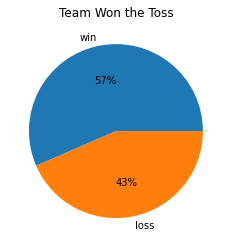

In [84]:
tosswin = pdf[(pdf['team1'] == pdf['toss_winner']) & (pdf['team1'] == pdf['winner'])].shape[0]
tosslos = pdf[(pdf['team1'] == pdf['toss_winner']) & (pdf['team2'] == pdf['winner'])].shape[0]
print(tosswin, tosslos)

plt.pie([tosswin, tosslos],labels=['win','loss'],autopct='%.0f%%')
plt.title("Team Won the Toss")
plt.show()

Here this plot shows that teams those who won the toss, 57% times they won the matches as well. Now, Lets deep dive and find out about their winning ratio, when they choose to bat or choose to field.

In [85]:
pdfbat = pdf[(pdf['team1'] == pdf['toss_winner']) & (pdf['toss_decision'] == 'bat')]
pdfbatwin = pdfbat[pdfbat['team1'] == pdfbat['winner']].shape[0]
pdfbatlos = pdfbat.shape[0] - pdfbatwin
print(pdfbatwin,pdfbatlos )

95 83


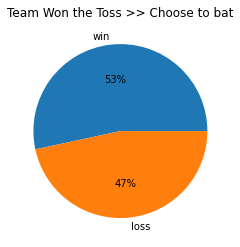

In [86]:
plt.pie([pdfbatwin,pdfbatlos],labels=['win','loss'],autopct='%.0f%%')
plt.title("Team Won the Toss >> Choose to bat")
plt.show()

Plot for the matches where Team won the toss , and choose to **field**. The below two plot is drawn on this base. 


In [87]:
pdffie = pdf[(pdf['team1'] == pdf['toss_winner']) & (pdf['toss_decision'] == 'field')]
pdffiewin = pdffie[pdffie['team1'] == pdffie['winner']].shape[0]
pdffielos = pdffie.shape[0] - pdffiewin
print(pdffiewin,pdffielos)

126 89


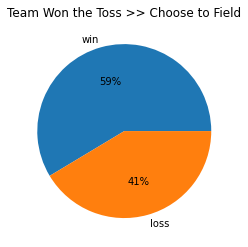

In [88]:
plt.pie([pdffiewin,pdffielos],labels=['win','loss'],autopct='%.0f%%')
plt.title("Team Won the Toss >> Choose to Field")
plt.show()

So, with these above two plots we can simply say that if the team won the toss and choose to bat the ratio is not much very inclined towards one particular situation. but in case of choose to field, its around 60-40 ratio.

**Plot for the matches where Team Lost the toss**

This is similar to the above but the only difference is of loosing the toss. So, We can directly say from the above plots itself, about the teams that lost the toss. 

In [89]:
team1win = pdf[pdf['team1'] == pdf['toss_winner']]
teamlosswin = team1win[team1win['team2'] == team1win['winner']].shape[0]
teamlossloss = team1win[team1win['team2'] != team1win['winner']].shape[0]
print(teamlosswin,teamlossloss)

170 223


In [90]:
pdf[pdf.winner == 'NA']

,team1,team2,toss_winner,toss_decision,winner
241,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NA
486,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NA
511,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NA
744,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NA


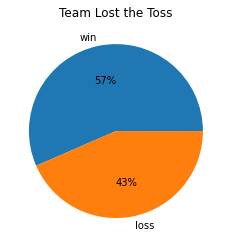

In [91]:
teamlosswin = pdf[(pdf['team1'] == pdf['toss_winner']) &  (pdf['winner'] != 'NA') & (pdf['team2'] != pdf['winner'])].shape[0]
teamlossloss = pdf[(pdf['team1'] == pdf['toss_winner']) &  (pdf['winner'] != 'NA') & (pdf['team1'] != pdf['winner']) ].shape[0]
plt.pie([teamlosswin,teamlossloss],labels=['win','loss'],autopct='%.0f%%')
plt.title("Team Lost the Toss")
plt.show()

Now, Here we can see that if the team has lost the toss, won more no of matches. It is 57% times when they won the match despite loosing the toss.

#Section 3

In [109]:
import sqlite3
import pandas as pd

dbase = sqlite3.connect('/content/drive/MyDrive/data.db')
c = dbase.cursor()

In [110]:
def TableCreation():
  c.execute('''CREATE TABLE IF NOT EXISTS ipl_mathist (match_id,date,
  player_of_match,venue_id,neutral_venue,team1,team2,toss_winner,toss_decision,
  winner,result,result_margin,eliminator,method,umpire1,umpire2)''')

  c.execute('''CREATE TABLE IF NOT EXISTS ipl_matbbb (match_id,inning,overs,ball, batsman, non_striker,
  bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind, player_dismissed, fielder,
  extras_type, batting_team, bowling_team)''')

  c.execute('''CREATE TABLE IF NOT EXISTS ipl_matven (venue_id, venue, city)''')
  
  iplmatch = pd.read_csv('/content/drive/MyDrive/Colab-Data/ipl_matches.csv')
  iplmatch.to_sql('ipl_mathist', dbase, if_exists='append', index = False)

  iplbbb = pd.read_csv('/content/drive/MyDrive/Colab-Data/ipl_ball_by_ball.csv')
  iplbbb.to_sql('ipl_matbbb', dbase, if_exists='append', index = False, chunksize = 10000)

  iplven = pd.read_csv('/content/drive/MyDrive/Colab-Data/ipl_venue.csv')
  iplven.to_sql('ipl_matven', dbase, if_exists='append', index = False)
  
  return print("Three tables have been created with following names \n 1. ipl_mathist \n 2. ipl_matbbb \n 3. ipl_matven")

In [111]:
def ReadDFReg():

  df_mat = pd.read_sql('''SELECT * FROM ipl_mathist''', dbase)
  df_bbb = pd.read_sql('''SELECT * FROM ipl_matbbb''', dbase)
  df_ven = pd.read_sql('''SELECT * FROM ipl_matven''', dbase)

  df_iplmat=spark.createDataFrame(df_mat) 
  df_iplbbb=spark.createDataFrame(df_bbb) 
  df_iplven=spark.createDataFrame(df_ven) 

  df_iplbbb.registerTempTable("DF_IPL_BBB")
  df_iplmat.registerTempTable("DF_IPL_MAT")
  df_iplven.registerTempTable("DF_IPL_VEN")

  return print("Three DF have been fetched from database named as df_iplmat, df_iplbbb and df_iplven")

In [112]:
import sqlite3
import pandas as pd
import numpy as np
from pyspark.sql.functions import desc
import matplotlib.pyplot as plt
import seaborn as sns


In [113]:
def getquery1():
  df_mat_elem_Y = df_iplmat.filter(df_iplmat.eliminator == 'Y')

  ids = df_mat_elem_Y.select("venue_id").collect()
  max_ele = max(set(ids), key = ids.count)
  qry1ans = df_iplven.filter(df_iplven.venue_id.contains(25)).show()

  return qry1ans

In [114]:
def getquery2():
  df_bbb_caught_only = df_iplbbb.filter(df_iplbbb.dismissal_kind == 'caught')
  df_bbb_caught_bowled = df_iplbbb.filter(df_iplbbb.dismissal_kind.contains("caught"))

  ids_co = df_bbb_caught_only.select("bowler").collect()
  ids_cb = df_bbb_caught_bowled.select("bowler").collect()

  bowler_max_CO = max(set(ids_co), key = ids_co.count)
  bowler_max_CB = max(set(ids_cb), key = ids_cb.count)

  if bowler_max_CO[0] == bowler_max_CB[0]:
    pp = 'also'
  else:
    pp = ""

  return print("Most wicket taker by only catches is : {} \n and Most wicket taker by catches and bowled together\
  is "+pp+" : {}".format(bowler_max_CO[0] , bowler_max_CB[0]))


In [115]:
def getquery3():
  df_mat_DL = df_iplmat.filter(df_iplmat.method == 'D/L')

  DLIds = df_mat_DL.select(df_mat_DL['match_id']).rdd.flatMap(lambda x:x).collect()
  df_DL = df_iplbbb.filter((df_iplbbb.match_id).isin(DLIds))
  df_DL_wic = df_DL.filter(df_DL.is_wicket == 1)

  bow = df_DL_wic.select('bowler').distinct().collect()
  bow_name = df_DL_wic.select(df_DL_wic['bowler']).rdd.flatMap(lambda x:x).collect()

  DL_Max_Wic_Bowler = max(set(bow_name), key = bow_name.count)
  print("The most wicket taker in D/L matches is {}".format(DL_Max_Wic_Bowler))

  frequency = {}
  print("Maximum Wickets takers by Catch bowlers report (in DLS Matches) \n")
  for item in bow_name:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1
  def printresults():
    k = 0
    for w in sorted(frequency, key=frequency.get, reverse=True):
        print(w,">>",frequency[w], " Wicket/s")
        if k>10:
          break
        k+=1
    return print("These are top 10 bowlers with most wickets in DLS")
  return printresults()
getquery3()

The most wicket taker in D/L matches is AB Dinda
Maximum Wickets takers by Catch bowlers report (in DLS Matches) 

R Ashwin >> 8  Wicket/s
AB Dinda >> 8  Wicket/s
MC Henriques >> 7  Wicket/s
B Kumar >> 6  Wicket/s
TA Boult >> 5  Wicket/s
L Balaji >> 5  Wicket/s
JD Unadkat >> 5  Wicket/s
DL Vettori >> 5  Wicket/s
A Mishra >> 4  Wicket/s
PP Chawla >> 4  Wicket/s
M Ntini >> 4  Wicket/s
YS Chahal >> 4  Wicket/s
These are top 10 bowlers with most wickets in DLS


In [116]:
def getquery4():
  df_NP_Bat_Runs = df_iplbbb.filter(df_iplbbb.overs >=7).select(['batsman', 'batsman_runs'])

  players = df_NP_Bat_Runs.select('batsman').rdd.flatMap(lambda x: x).collect()
  uni_players = np.unique(players)

  max_scorer_player = ""
  max_strike_rate = -1
  player_score_Data = {}
  for player in uni_players:
    rate = ((df_NP_Bat_Runs.filter(df_NP_Bat_Runs.batsman == player).agg({'batsman_runs': 'sum'}).collect()[0][0]) /  \
          (df_NP_Bat_Runs.filter(df_NP_Bat_Runs.batsman == player).count()))
    if rate > max_strike_rate:
      max_strike_rate = rate
      max_scorer_player = player
  
  return print("The Player with maximum strike rate in the Non Powerplay overs is : {} with \
   rate of {} %".format(max_scorer_player, max_strike_rate*100))

In [117]:
def getquery5():
  df_extra_runs = df_iplbbb.filter(df_iplbbb.extra_runs > 0)
  matches = df_iplbbb.select('match_id').rdd.flatMap(lambda x: x).collect()
  matches = np.unique(matches)

  Matches_Extras = []
  for match in matches:
    extsum = df_extra_runs.filter(df_extra_runs.match_id == int(match)).agg({'extra_runs': 'sum'}).collect()[0][0]
    tup = (int(match), extsum)
    Matches_Extras.append(tup)

  columns = ["match_id","extra_runs_total"]
  Match_Ext_df = spark.createDataFrame(Matches_Extras, columns)
  Match_Ext_df = Match_Ext_df.orderBy('match_id')
  df_iplmat = df_iplmat.orderBy("match_id")
  df_iplmat = df_iplmat.withColumn("match_id", df_iplmat["match_id"].cast("int"))
  Match_Ext_df = Match_Ext_df.withColumn("match_id", Match_Ext_df["match_id"].cast("int"))

  df_iplmat = df_iplmat.orderBy("match_id")
  Match_Ext_df = Match_Ext_df.orderBy("match_id")

  vids = df_iplven.select('venue_id').rdd.flatMap(lambda x: x).collect()

  vid_exruns = []
  for id in vids:
    ven_matches = df_iplmat.filter(df_iplmat.venue_id == int(id)).select(df_iplmat['match_id']).rdd.flatMap(lambda x: x).collect()
    verun = Match_Ext_df.filter(Match_Ext_df.match_id.isin(ven_matches)).rdd.map(lambda x: (1,x[1])).reduceByKey(lambda x,y: x + y).collect()[0][1]
    venname = df_iplven.filter(df_iplven.venue_id == id).collect()[0][1]
    viextup = (str(venname), int(verun))
    vid_exruns.append(viextup)

  vid_run_df = spark.createDataFrame(vid_exruns, ['Venue_ID', 'Runs'])
  vid_run_df = vid_run_df.orderBy(desc('Runs'))

  return vid_run_df.show()

In [118]:
def getquery6():

  neu_ven = df_iplmat.filter(df_iplmat['neutral_venue'] ==1)
  print(neu_ven.count())
  neu_ven_pom = neu_ven.cube('player_of_match').count()
  
  qr6 = neu_ven_pom.orderBy(desc('count'))

  return qr6.show(10)

In [119]:
def getquery7():
  sub_df = df_iplbbb.select(df_iplbbb["match_id"],df_iplbbb["batsman"],df_iplbbb['non_striker'],df_iplbbb["batsman_runs"],df_iplbbb['extra_runs'],\
                            df_iplbbb['total_runs'],df_iplbbb["is_wicket"],df_iplbbb["dismissal_kind"],df_iplbbb["player_dismissed"])
  
  uni_players = np.unique(df_iplbbb.select('batsman').rdd.flatMap(lambda x: x).collect())

  aggrun_batsman = []
  for player in uni_players:
    aggrun = df_iplbbb.filter(df_iplbbb.batsman == player ).agg({'batsman_runs': 'sum'}).collect()[0][0]
    tupp = (str(player), int(aggrun))
    aggrun_batsman.append(tupp)

  bats_aggrun = spark.createDataFrame(aggrun_batsman, ['player', 'Agg_Runs'])
  bats_aggrun = bats_aggrun.orderBy('player')

  wic_balls = df_iplbbb.filter(df_iplbbb.is_wicket == 1)


  player_wics = []
  for plr in uni_players:
    plr_wics = wic_balls.filter(wic_balls.player_dismissed == plr).count()
    ptu = (str(plr), int(plr_wics))
    player_wics.append(ptu)

  player_wics = spark.createDataFrame(player_wics,['Player','tot_outs'])

  batt_Avg = []
  for i in range(len(uni_players)):
    runs = bats_aggrun.collect()[i][1]
    wickets = player_wics.collect()[i][1]
    if wickets == 0:
      runs = 0  # Since the batting avg can't be calculated we can simply draw it as 0.
      wickets = 1
    plr_avg = runs / wickets
    plr_nm = bats_aggrun.collect()[i][0]
    plr_sc = (str(plr_nm) , float(plr_avg))
    batt_Avg.append(plr_sc)

  batt_Avg = spark.createDataFrame(batt_Avg, ['player', 'batting_average'])
  batt_Avg = batt_Avg.orderBy(desc('batting_average'))
  
  qr7 = batt_Avg.orderBy(desc('batting_average'))

  return qr7.show()

In [120]:
def getquery8():
  ump1 = df_iplmat.select(df_iplmat['umpire1']).rdd.flatMap(lambda x: x).collect()
  ump2 = df_iplmat.select(df_iplmat['umpire2']).rdd.flatMap(lambda x: x).collect()
  umpires = ump1 + ump2

  def maxFreq(arr):
    n = len(arr)
    res = 0
    count = 1
      
    for i in range(1, n):
        if (arr[i] == arr[res]):
            count += 1
        else:
            count -= 1

        if (count == 0):
            res = i
            count = 1
          
    return arr[res]

  freq = maxFreq(umpires)

  count = 0
  for i in range(len(umpires)):
          if(umpires[i] == freq):
              count += 1
          
  print("Umpire ", freq," Officiated the maximum matches in IPL with a count of ", count, " matches in given timeline")

getquery8()

Umpire  S Ravi  Officiated the maximum matches in IPL with a count of  121  matches in given timeline


In [121]:
def getquery9():
  vkohli_df = df_iplbbb.filter(df_iplbbb.batsman == "V Kohli")
  vk_ind_mat = vkohli_df.select(vkohli_df['match_id']).rdd.flatMap(lambda x:x).collect()
  vk_ind_mat = np.unique(vk_ind_mat)
  vkohli_df = vkohli_df.select(vkohli_df['match_id'], vkohli_df['batsman_runs'])

  vk_ind_score = []
  for match in vk_ind_mat:
    runs  = vkohli_df.filter(vkohli_df.match_id == int(match)).agg({'batsman_runs':'sum'}).collect()[0][0]
    vktup = (str(match),runs)
    vk_ind_score.append(vktup)

  vk_ind_score = spark.createDataFrame(vk_ind_score,['Match_Id', 'Score'])
  vk_ind_score = vk_ind_score.orderBy(desc('Score'))

  vneid = df_iplmat.filter(df_iplmat.match_id == vk_ind_score.collect()[0][0]).collect()[0]['venue_id']

  qr9 = df_iplven.filter(df_iplven.venue_id == vneid)

  return qr9.show()

In [122]:
def getquery10():
  mypdf = df_iplmat.toPandas()
  pdf = mypdf[['team1','team2','toss_winner','toss_decision','winner']]

  tosswin = pdf[(pdf['team1'] == pdf['toss_winner']) & (pdf['team1'] == pdf['winner'])].shape[0]
  tosslos = pdf[(pdf['team1'] == pdf['toss_winner']) & (pdf['team2'] == pdf['winner'])].shape[0]
  print(tosswin, tosslos)

  plt.pie([tosswin, tosslos],labels=['win','loss'],autopct='%.0f%%')
  plt.title("Team Won the Toss")
  plt.show()


  pdfbat = pdf[(pdf['team1'] == pdf['toss_winner']) & (pdf['toss_decision'] == 'bat')]
  pdfbatwin = pdfbat[pdfbat['team1'] == pdfbat['winner']].shape[0]
  pdfbatlos = pdfbat.shape[0] - pdfbatwin
  print(pdfbatwin,pdfbatlos )

  plt.pie([pdfbatwin,pdfbatlos],labels=['win','loss'],autopct='%.0f%%')
  plt.title("Team Won the Toss >> Choose to bat")
  plt.show()


  pdffie = pdf[(pdf['team1'] == pdf['toss_winner']) & (pdf['toss_decision'] == 'field')]
  pdffiewin = pdffie[pdffie['team1'] == pdffie['winner']].shape[0]
  pdffielos = pdffie.shape[0] - pdffiewin
  print(pdffiewin,pdffielos)

  plt.pie([pdffiewin,pdffielos],labels=['win','loss'],autopct='%.0f%%')
  plt.title("Team Won the Toss >> Choose to Field")
  plt.show()

  team1win = pdf[pdf['team1'] == pdf['toss_winner']]
  teamlosswin = team1win[team1win['team2'] == team1win['winner']].shape[0]
  teamlossloss = team1win[team1win['team2'] != team1win['winner']].shape[0]
  print(teamlosswin,teamlossloss)

  teamlosswin = pdf[(pdf['team1'] == pdf['toss_winner']) &  (pdf['winner'] != 'NA') & (pdf['team2'] != pdf['winner'])].shape[0]
  teamlossloss = pdf[(pdf['team1'] == pdf['toss_winner']) &  (pdf['winner'] != 'NA') & (pdf['team1'] != pdf['winner']) ].shape[0]
  plt.pie([teamlosswin,teamlossloss],labels=['win','loss'],autopct='%.0f%%')
  plt.title("Team Lost the Toss")
  plt.show()

In [123]:
class Database:

  def __init__(self):

    db = sqlite3.connect('/content/drive/MyDrive/data.db')
    c = db.cursor()
  
    TableCreation()   #Pre defined method to create the tables for the all three datasets
    ReadDFReg()   #Reading the data and registering them as pyspark tables


  #Here are the methods to get the results, Individual line by line code is in section 2 whereas the complete method is defined in the section 3 itself. 

  def get_query1_result(self):
    return getquery1()
  def get_query2_result(self):
    return getquery2()
  def get_query3_result(self):
    return getquery3()
  def get_query4_result(self):
    return getquery4()
  def get_query5_result(self):
    return getquery5()
  def get_query6_result(self):
    return getquery6()
  def get_query7_result(self):
    return getquery7()
  def get_query8_result(self):
    return getquery8()
  def get_query9_result(self):
    return getquery9()
  def get_query10_result(self):
    print("These below plots shows that on winning the toss what are the chances to win the match, \
    similarly on loosing the toss, what are the chances to win or loose the match.")
    return getquery10()


In [124]:
db = Database()

Three tables have been created with following names 
 1. ipl_mathist 
 2. ipl_matbbb 
 3. ipl_matven
Three DF have been fetched from database named as df_iplmat, df_iplbbb and df_iplven


In [125]:
db.get_query8_result()

Umpire  S Ravi  Officiated the maximum matches in IPL with a count of  121  matches in given timeline
